Something is Wrong!!

# Goal
2. build a neural network to predict single/double-stranded probability

# Load Data

In [ ]:
import hickle  as hkl

In [ ]:
data2 =hkl.load('./Gen_data/CROSS_Net_input.hkl')

### Tips  删除dict某些值

# Generate NetWork

In [10]:
import theano
from lasagne.layers import InputLayer
from lasagne.layers import DenseLayer
from lasagne.layers import DropoutLayer
try:
    from lasagne.layers.dnn import Conv2DDNNLayer as Conv2DLayer
    from lasagne.layers.dnn import MaxPool2DDNNLayer as MaxPool2DLayer
    print 'Using Lasagne.layers.dnn (faster)'
except ImportError:
    from lasagne.layers import Conv2DLayer
    from lasagne.layers import MaxPool2DLayer
    print 'Using Lasagne.layers (slower)'
from lasagne.nonlinearities import softmax, rectify, leaky_rectify
from lasagne.updates import adam
from lasagne.objectives import squared_error

from nolearn.lasagne import NeuralNet
from nolearn.lasagne import TrainSplit
from nolearn.lasagne import objective
from nolearn.lasagne import BatchIterator

from lasagne.nonlinearities import tanh 
floatX = theano.config.floatX

Using gpu device 0: GeForce GTX TITAN X (CNMeM is disabled, cuDNN 5105)
/home/yinqijin/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)


Using Lasagne.layers.dnn (faster)


/home/yinqijin/anaconda2/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [40]:
cutdown_len = 13
layer1 = InputLayer(shape=(None,1,cutdown_len,4))  #输入是序列的one-hot编码
layer2 = DenseLayer(layer1, num_units=20 ,nonlinearity=tanh)
network = DenseLayer(layer2,num_units=1,nonlinearity=tanh)

In [41]:

lr = theano.shared(np.float32(1e-4))

net = NeuralNet(
            network,
            max_epochs=50,
            update=adam,
            update_learning_rate=lr,
            train_split=TrainSplit(eval_size=0.1),
                regression = True,
            objective_loss_function = squared_error,
            #on_epoch_finished=[
            #    AdjustVariable(lr, target=1e-8, half_life=20)],
            verbose=4)

# Import Data

In [13]:
X = data2['mat']
Y = data2['score']

In [14]:
Y_ = [ item[(len(item)-1)/2] for item in Y]

In [15]:
print len(X),len(Y_)
print Y_[:2]

1111101 1111101
[0.015, 0.002]


In [16]:
X_ = np.zeros((len(X),4,cutdown_len))
print X_.shape

(1111101, 4, 13)


In [18]:
X_[:,:,:] = X[:]

In [19]:
Y_ = np.array(Y_)

In [20]:
from sklearn.cross_validation import ShuffleSplit
rs = ShuffleSplit(len(Y_), n_iter=1)

In [21]:
X_[:2]

array([[[ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.],
        [ 1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]],

       [[ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  0.],
        [ 1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.],
        [ 0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]])

In [22]:
for train_idx, test_idx in rs:
    X_train = X_[train_idx,:]
    y_train = Y_[train_idx]
    X_test = X_[test_idx,:]
    y_test = Y_[test_idx]

In [23]:
print X_train[:2]
print y_train[:2]

[[[ 0.  0.  0.  0.  1.  0.  0.  0.  1.  1.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
  [ 1.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  1.]
  [ 0.  1.  1.  0.  0.  0.  1.  1.  0.  0.  1.  1.  0.]]

 [[ 0.  0.  1.  1.  1.  0.  0.  1.  1.  1.  0.  1.  1.]
  [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.]
  [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]]]
[-0.022 -0.154]


In [24]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

In [25]:
print X_train[:2]
print y_train[:2]

[[[ 0.  0.  0.  0.  1.  0.  0.  0.  1.  1.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
  [ 1.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  0.  1.]
  [ 0.  1.  1.  0.  0.  0.  1.  1.  0.  0.  1.  1.  0.]]

 [[ 0.  0.  1.  1.  1.  0.  0.  1.  1.  1.  0.  1.  1.]
  [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
  [ 0.  0.  0.  0.  0.  1.  1.  0.  0.  0.  0.  0.  0.]
  [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]]]
[-0.022 -0.154]


#方便测试用
cutdown_len = 13
layer1 = InputLayer(shape=(None,4,cutdown_len))
layer2 = DenseLayer(layer1, num_units=20 ,nonlinearity=tanh)
network = DenseLayer(layer2,num_units=1,nonlinearity=tanh)

lr = theano.shared(np.float32(1e-4))

net = NeuralNet(
            network,
            max_epochs=50,
            update=adam,
            update_learning_rate=lr,
            train_split=TrainSplit(eval_size=0.1),
                regression = True,
            objective_loss_function = squared_error,
            #on_epoch_finished=[
            #    AdjustVariable(lr, target=1e-8, half_life=20)],
            verbose=4)

In [43]:
net.fit(X_train, y_train)

# Neural Network with 3457 learnable parameters

## Layer information

  #    name  size
---  ------  ------
  0          4x13
  1          64
  2          1

  epoch    trn loss    val loss    trn/val  dur
-------  ----------  ----------  ---------  -----
      1     0.41066     0.40608    1.01128  5.42s
      2     0.40573     0.40536    1.00092  5.23s
      3     0.40517     0.40492    1.00061  5.00s
      4     0.40480     0.40462    1.00046  4.92s
      5     0.40454     0.40439    1.00036  4.81s
      6     0.40433     0.40422    1.00029  4.81s
      7     0.40417     0.40407    1.00023  4.81s
      8     0.40402     0.40395    1.00018  4.80s
      9     0.40390     0.40384    1.00014  4.99s
     10     0.40379     0.40375    1.00010  4.86s
     11     0.40369     0.40366    1.00006  4.87s
     12     0.40359     0.40359    1.00002  4.84s
     13     0.40350     0.40351    0.99998  4.63s
     14     0.40342     0.40345    0.99994  4.69s
     15     0.40334     0.40338    0.99989 

NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x7fae1b9b2310>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x7fae1b9b2210>,
     check_input=True, custom_scores=None,
     layers=[<lasagne.layers.dense.DenseLayer object at 0x7fae02974b50>],
     loss=None, max_epochs=50, more_params={},
     objective=<function objective at 0x7fae1b9b3758>,
     objective_loss_function=<function squared_error at 0x7fae2308b500>,
     on_batch_finished=[],
     on_epoch_finished=[<nolearn.lasagne.handlers.PrintLog instance at 0x7fae0009a3f8>],
     on_training_finished=[],
     on_training_started=[<nolearn.lasagne.handlers.PrintLayerInfo instance at 0x7fae0c8f8b90>],
     regression=True, scores_train=[], scores_valid=[],
     train_split=<nolearn.lasagne.base.TrainSplit object at 0x7fae0298d650>,
     update=<function adam at 0x7fae23117758>,
     update_learning_rate=<TensorType(float32, scalar)>,
     use_label_encode

# Save network values

In [28]:
from nolearn.lasagne import NeuralNet
net.initialize_layers()
net_params=[]
net.save_params_to('./Gen_data/CROSS_net_values.pkl')

# Test Network

## Load Network Values

In [29]:
import theano
from lasagne.layers import InputLayer
from lasagne.layers import DenseLayer
from lasagne.layers import DropoutLayer
try:
    from lasagne.layers.dnn import Conv2DDNNLayer as Conv2DLayer
    from lasagne.layers.dnn import MaxPool2DDNNLayer as MaxPool2DLayer
    print 'Using Lasagne.layers.dnn (faster)'
except ImportError:
    from lasagne.layers import Conv2DLayer
    from lasagne.layers import MaxPool2DLayer
    print 'Using Lasagne.layers (slower)'
from lasagne.nonlinearities import softmax, rectify, leaky_rectify
from lasagne.updates import adam
from lasagne.objectives import squared_error

from nolearn.lasagne import NeuralNet
from nolearn.lasagne import TrainSplit
from nolearn.lasagne import objective
from nolearn.lasagne import BatchIterator

from lasagne.nonlinearities import tanh 
floatX = theano.config.floatX

cutdown_len = 13
layer1 = InputLayer(shape=(None,cutdown_len,4))
layer2 = DenseLayer(layer1, num_units=20 ,nonlinearity=tanh)
network = DenseLayer(layer2,num_units=1,nonlinearity=tanh)

lr = theano.shared(np.float32(1e-4))

net = NeuralNet(
            network,
            max_epochs=7,
            update=adam,
            update_learning_rate=lr,
            train_split=TrainSplit(eval_size=0.1),
                regression = True,
            objective_loss_function = squared_error,
            #on_epoch_finished=[
            #    AdjustVariable(lr, target=1e-8, half_life=20)],
            verbose=4)

Using Lasagne.layers.dnn (faster)


In [30]:
# Load  NetWork Values
from nolearn.lasagne import NeuralNet
net.initialize_layers()
net.load_params_from('./Gen_data/CROSS_net_values.pkl')

Loaded parameters to layer 'dense1' (shape 52x20).
Loaded parameters to layer 'dense1' (shape 20).
Loaded parameters to layer 'dense2' (shape 20x1).
Loaded parameters to layer 'dense2' (shape 1).


## Test

In [44]:
y_1 = net.predict(X_test[:10])
print y_1
print y_test[:10]

[[ 0.12956685]
 [-0.0355046 ]
 [ 0.05500717]
 [-0.07661961]
 [ 0.02709704]
 [ 0.09280252]
 [ 0.00844396]
 [-0.07352723]
 [-0.07530339]
 [-0.00712793]]
[ 0.          0.006      -0.28299999 -0.161       0.041       0.         -0.106
 -0.49599999 -0.029      -0.366     ]


In [45]:
y_pred = net.predict(X_test)

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

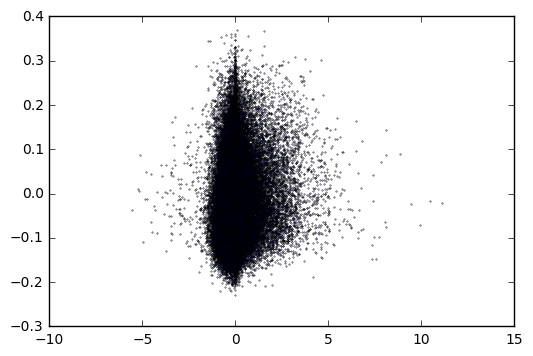

In [47]:
plt.scatter(y_test,y_pred,0.1)

In [48]:
from scipy import stats

In [49]:
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test,y_pred[:,0])
print r_value

0.115044346662
